In [2]:
# The following is necessary to run the cells that follow. Run this cell once at the beginning
%load_ext autoreload
%autoreload 2
%matplotlib inline
import sys
import matplotlib.pyplot as plt
import pandas as pd
sys.path.append("../../")
sys.path.append("../") 
plt.rcParams["figure.figsize"] = [12, 7]



# A gc_event_dataframe has the following columns
> ## DateTime

> ## TimeFromStart_seconds

> ## EventType

> ## EventName

> ## AdditionalEventInfo

> ## MemoryChange_MB

> ## Duration_miliseconds

In [3]:
                        # Fill in the following 3 variables
################################################################################################
files = ["../../datasets/short/ZGC_short.log", "../../datasets/short/ShenandoahGC_short.log"]
labels = ["ZGC", "Shenandoah"]
# time_range_seconds = [0, 100]
time_range_seconds = None  # includes full log
################################################################################################
from src.read_log_file import get_parsed_comparions_from_files 
gc_event_dataframes = get_parsed_comparions_from_files(files, time_range_seconds)

## How to use filter_by and group_by
> ## Filter_by= list of boolean functions to evaluate to keep a cell

## Compare STW pauses during runtime

Text(0, 0.5, 'Pause duration in miliseconds')

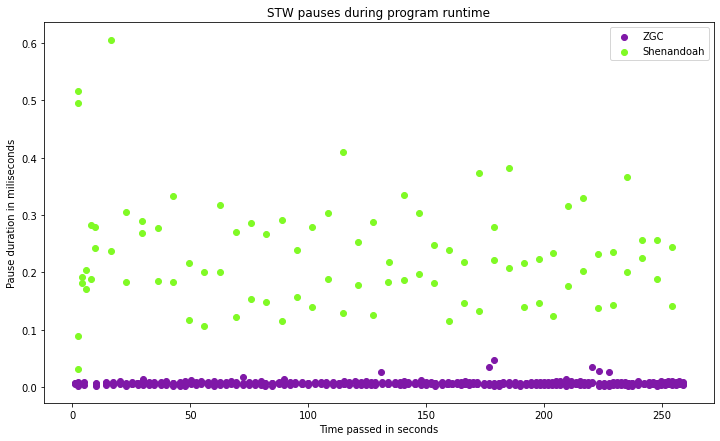

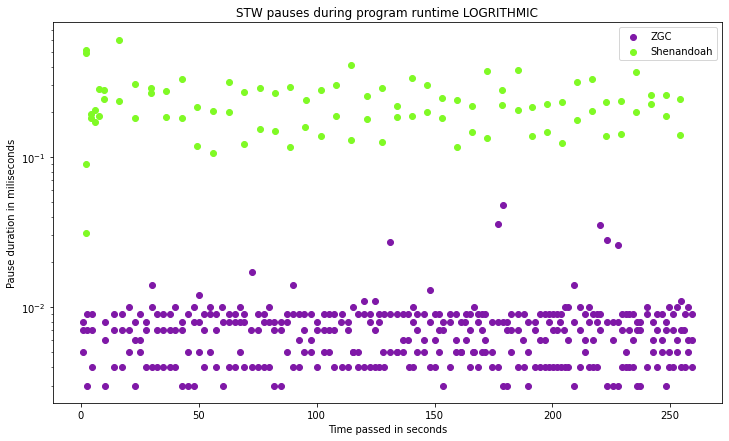

In [4]:
from plotting import plot_scatter

# Chart #1, linear Y axis
pauses_only = [(lambda row : row["EventType"] == "Pause")]
graph = plot_scatter(gc_event_dataframes,filter_by = pauses_only, labels=labels)
_ = graph.set_title("STW pauses during program runtime")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Pause duration in miliseconds")

############################################################################################################

# Chart #2, logritmic Y axos

graph = plot_scatter(gc_event_dataframes, filter_by = pauses_only, labels = labels)
graph.set_yscale("log") # LOGRITHMIC
_ = graph.set_title("STW pauses during program runtime LOGRITHMIC")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Pause duration in miliseconds")



## Concurrent durations during runtime

Text(0, 0.5, 'Concurrent durations in miliseconds')

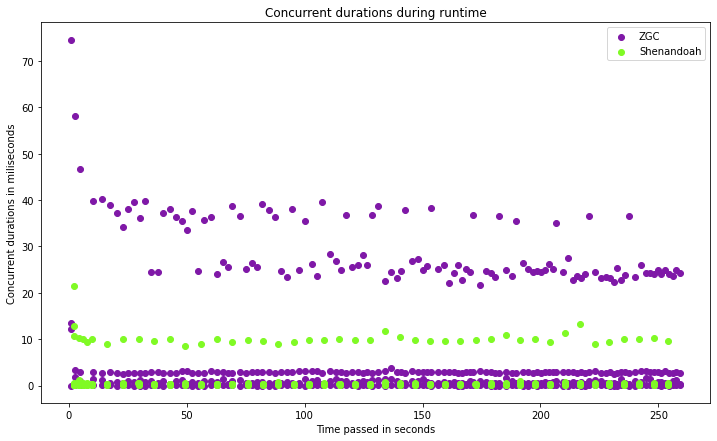

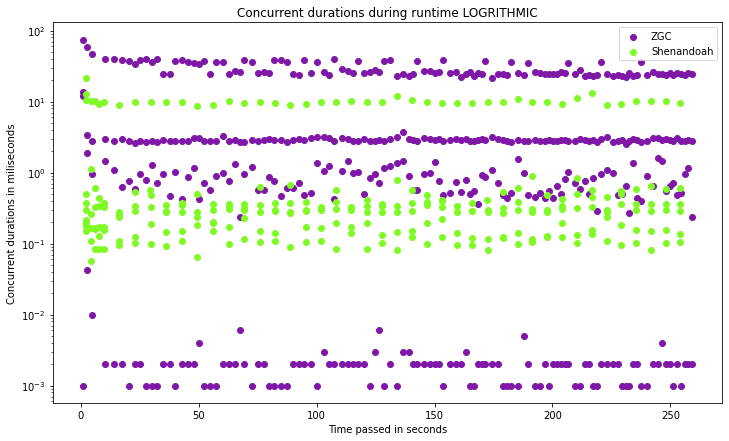

In [5]:
from plotting import plot_scatter

# Linear graph
concurrent_only = [(lambda row: row["EventType"] == "Concurrent")]
graph = plot_scatter(gc_event_dataframes, labels=labels, filter_by= concurrent_only)
_ = graph.set_title("Concurrent durations during runtime")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Concurrent durations in miliseconds")

# Logrithmic Graph
graph = plot_scatter(gc_event_dataframes, labels=labels, filter_by= concurrent_only)
graph.set_yscale("log") # LOGRITHMIC
_ = graph.set_title("Concurrent durations during runtime LOGRITHMIC")
graph.set_xlabel("Time passed in seconds")
graph.set_ylabel("Concurrent durations in miliseconds")


## Time spent in STW vs. Concurrent

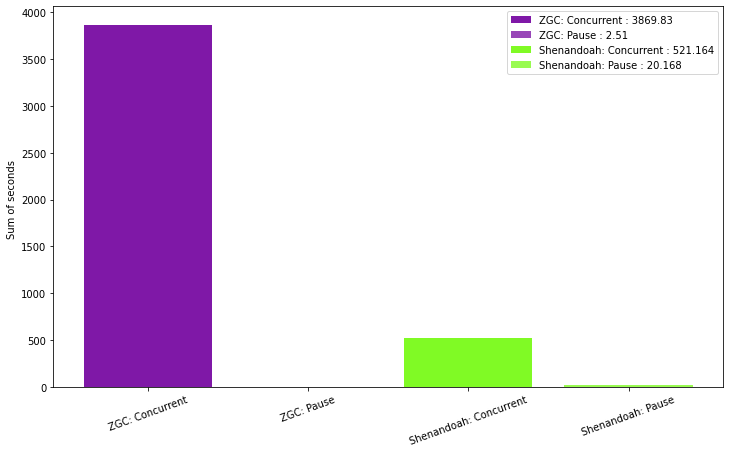

In [6]:
from plotting import plot_bar_sum



duration_present = [(lambda row: row["Duration_miliseconds"] != None)]
graph = plot_bar_sum(gc_event_dataframes, group_by = "EventType", filter_by = duration_present, labels= labels)
_ = graph.set_title = "Sum of event durations in miliseconds"
_ = graph.set_ylabel("Sum of seconds ")
_ = plt.xticks(rotation = 20)



## Comparing Trends within the data

In [7]:
from plotting import plot_trends

print("\t\t\tPauses during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       filter_by = [lambda row: row["EventType"] == "Pause"],
       labels= labels,
       throughput=True)
print("\n\n\n")

print("\t\t\tPauses by name during runtime\n------------------------------------------------------------------------------------------------------------------")
plot_trends(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [lambda row: row["EventType"] == "Pause"],
       labels= labels)


			Pauses during runtime
------------------------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     | Throughput   |
-------------------------------------------------------------------------------------------------------------------
ZGC                     | 348          | 0.048        | 2.51         | 0.0072       | 0.0043       | 100.0%       | 
Shenandoah              | 88           | 0.606        | 20.168       | 0.2292       | 0.093        | 99.99%       | 




			Pauses by name during runtime
------------------------------------------------------------------------------------------------------------------
 Trends (ms)            | Event Count  | Max Duration | Sum Duration | Mean Duration| Std Dev.     |
----------------------------------------------------------------------------------------------------
ZGC: Mark End           | 116          |

## Percentiles of event durations

In [8]:
from plotting import plot_percentiles
print(labels)
print("\t\t\tPauses during runtime\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       filter_by = [lambda row: row["EventType"] == "Pause"],
       labels= labels)

print("\n\n")

print("\t\t\tPauses during runtime by name\n----------------------------------------------------------------------------------")
plot_percentiles(gc_event_dataframes, 
       group_by = "EventName",
       filter_by= [lambda row: row["EventType"] == "Pause"],
       labels= labels)
print(labels)
# TODO: fix the printing of the second table's TITLES

['ZGC', 'Shenandoah']
			Pauses during runtime
----------------------------------------------------------------------------------
Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
ZGC        | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.03 ms   | 0.04 ms   | 0.05 ms   | 
Shenandoah | 0.22 ms   | 0.28 ms   | 0.33 ms   | 0.38 ms   | 0.53 ms   | 0.6 ms    | 0.61 ms   | 

Labels:  ['ZGC', 'Shenandoah']



			Pauses during runtime by name
----------------------------------------------------------------------------------
Percentiles| 50%       | 75%       | 90%       | 95%       | 99%       | 99.9%     | 99.99%    | 
------------------------------------------------------------------------------------------------
ZGC: Mark  | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.01 ms   | 0.02 ms   | 0.02 ms   | 
ZGC: Mark  | 0.01 ms   | 0.01 ms   

## Mean durations in miliseconds, pauses

['ZGC', 'Shenandoah']
['ZGC', 'Shenandoah']


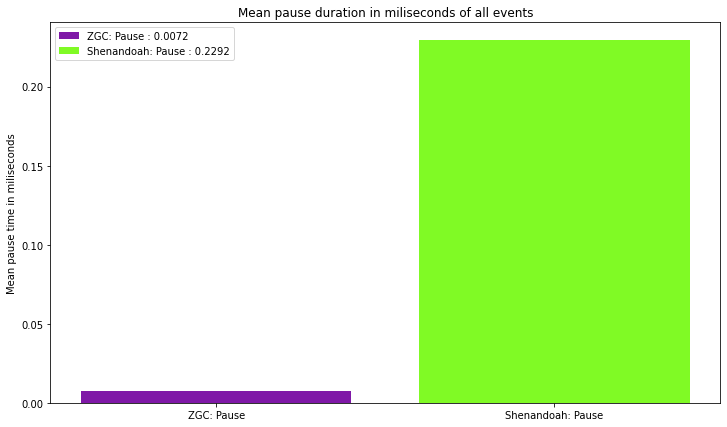

In [9]:

from plotting import plot_bar_avg
print(labels)
graph = plot_bar_avg(gc_event_dataframes, group_by = "EventType", filter_by = [lambda row: row["EventType"] == "Pause"], labels = labels)
_ = graph.set_title("Mean pause duration in miliseconds of all events")
_ = graph.set_ylabel("Mean pause time in miliseconds")
print(labels)

## Heap allocation used before & after GC

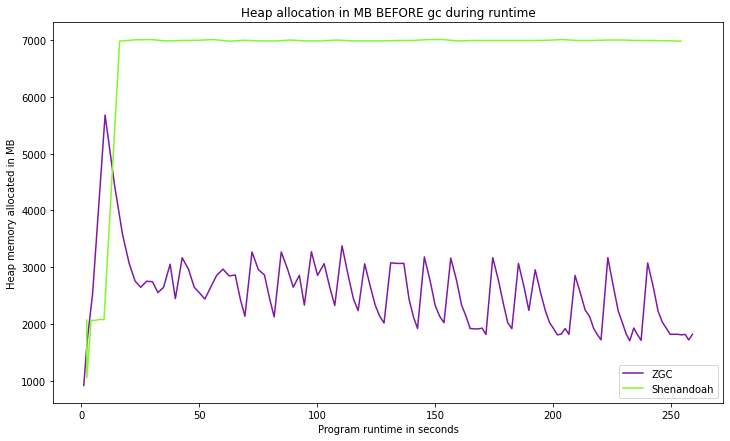

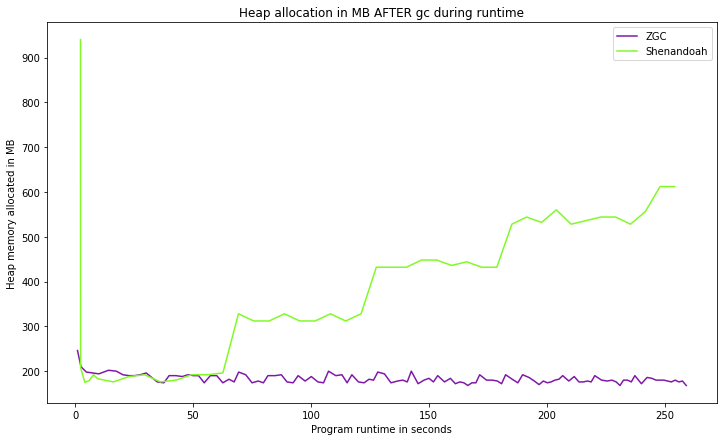

In [10]:
from plotting import plot_line


plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = [lambda row: row["HeapBeforeGC"] != None],
            labels = labels,
            #labels = [label + " Before GC" for label in labels], 
            column = "HeapBeforeGC")
_ = plot.set_title("Heap allocation in MB BEFORE gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")


plot = plot_line(gc_event_dataframes,
            group_by = None, 
            filter_by = [lambda row: row["HeapAfterGC"]!= None],
            labels = labels,
           # labels = [label + " After GC" for label in labels], 
            column = "HeapAfterGC")

_ = plot.set_title("Heap allocation in MB AFTER gc during runtime")
_ = plot.set_ylabel("Heap memory allocated in MB")
_ = plot.set_xlabel("Program runtime in seconds")

handles, labels = plot.get_legend_handles_labels()



## MB reclaimed during GC during runtime

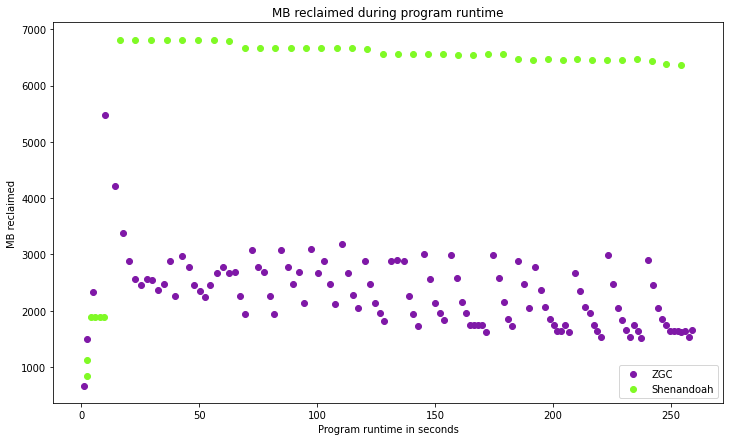

In [11]:
from plotting import plot_reclaimed_bytes

gc_values_present = [lambda row: row["HeapBeforeGC"] != None and row["HeapAfterGC"] != None]
graph = plot_reclaimed_bytes(gc_event_dataframes, filter_by = gc_values_present, labels = labels)
_ = graph.set_title("MB reclaimed during program runtime")
_ = graph.set_ylabel("MB reclaimed")
_ = graph.set_xlabel("Program runtime in seconds")


## Heatmaps for each log

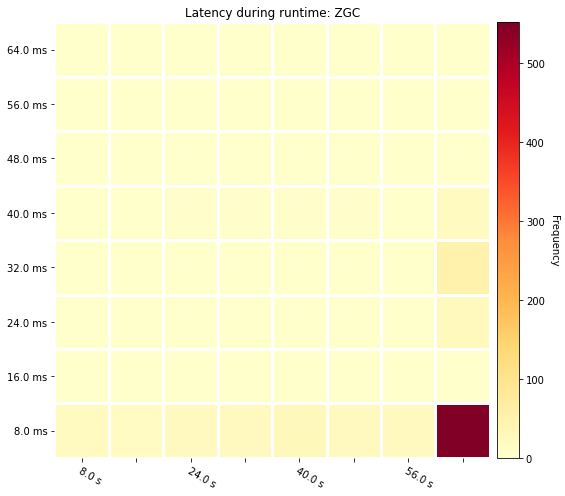

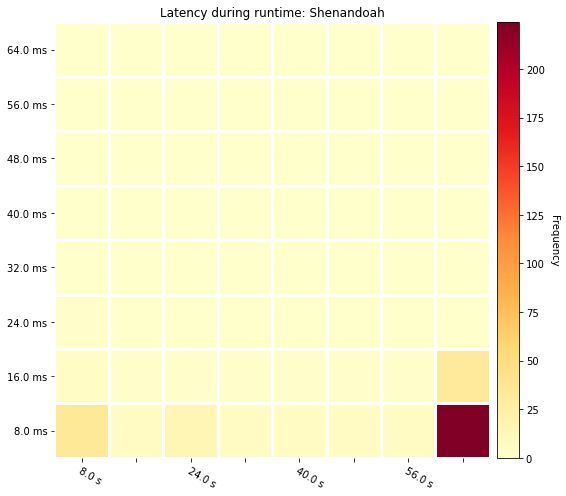

In [12]:
from src.graphing.heatmap import plot_heatmap, get_heatmap_data
for label, gc_event_dataframe in zip(labels, gc_event_dataframes):
    heatmap, dimensions = get_heatmap_data(gc_event_dataframe, 8,8,8,8, True)                                                                                   # Set true to false 
#plot_heatmap(heatmap, dimensions, True)
    graph = plot_heatmap(heatmap, dimensions, False)
    graph.set_title("Latency during runtime: " +  label)
plt.rcParams["figure.figsize"] = [12, 7]

## Frequency of pauses histogram

['ZGC', 'Shenandoah']


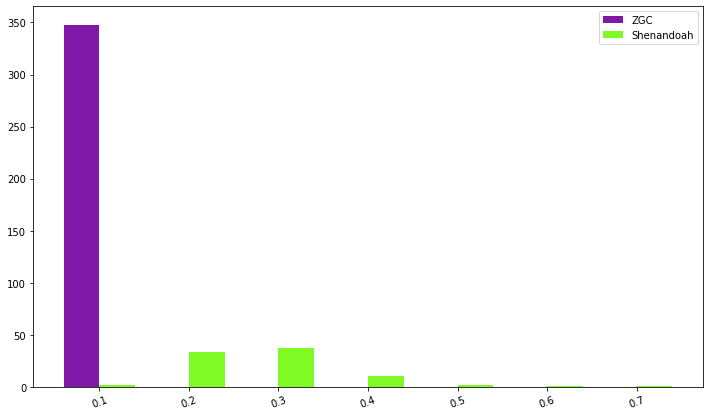

In [13]:
from plotting2 import plot_frequency_intervals

# All intervals are in seconds
print(labels)
plot_frequency_intervals(gc_event_dataframes, filter_by = [(lambda row: row["EventType"] == "Pause")], interval_duration= 0.1, labels = labels)
_ = plt.xticks(rotation = 20)

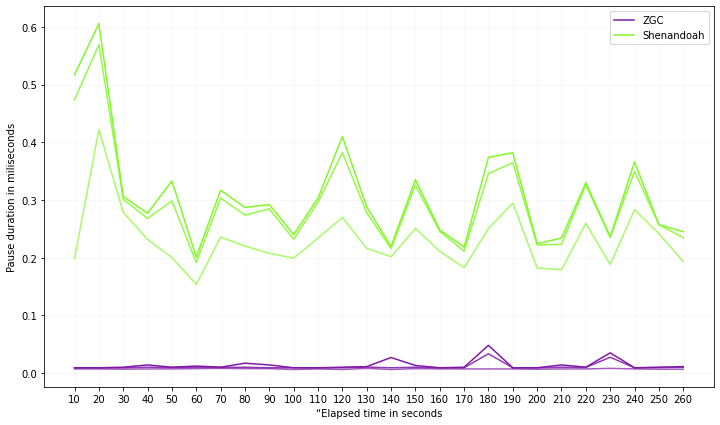

In [17]:
from plotting2 import plot_percentile_intervals
plot = plot_percentile_intervals(gc_event_dataframes, 
                                filter_by = [(lambda row: row["EventType"] == "Pause")], 
                                interval_duration = 10 , 
                                labels = labels,
                                percentiles = [99.9, 90, 50])
plot.set_ylabel("Pause duration in miliseconds")
plot.set_xlabel("“Elapsed time in seconds")
plot.grid(alpha = 0.1)

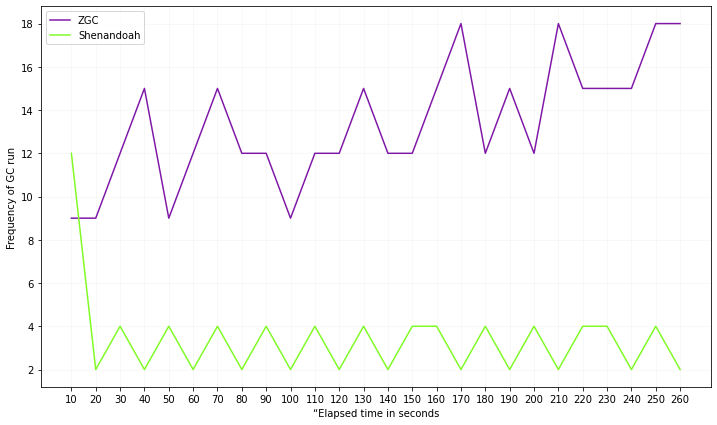

In [15]:
from plotting2 import plot_frequency_of_gc_intervals
plot = plot_frequency_of_gc_intervals(gc_event_dataframes, filter_by = [(lambda row: row["EventType"] == "Pause")], interval_duration = 10 , labels = labels)
plot.set_ylabel("Frequency of GC run")
plot.set_xlabel("“Elapsed time in seconds")
plot.grid(alpha = 0.1)

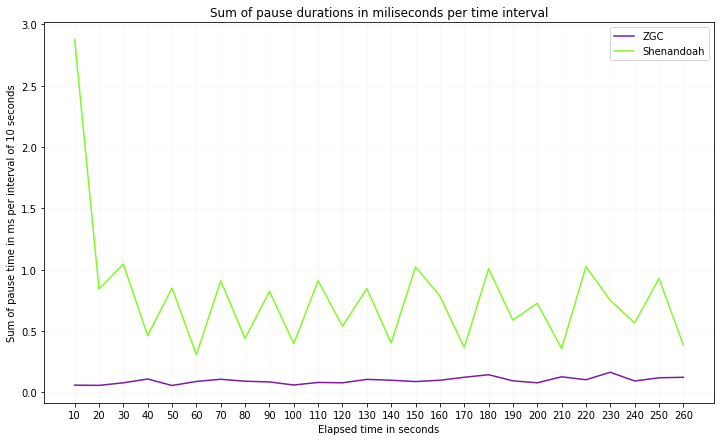

In [18]:
from plotting2 import plot_sum_pause_intervals
interval_duration = 10
plot = plot_sum_pause_intervals(gc_event_dataframes, filter_by = [(lambda row: row["EventType"] == "Pause")], interval_duration = interval_duration , labels = labels)
_ = plot.set_title("Sum of pause durations in miliseconds per time interval")
plot.set_ylabel("Sum of pause time in ms per interval of " + str(interval_duration) + " seconds", )
plot.set_xlabel("Elapsed time in seconds")
plot.grid(alpha = 0.1)